# Notebook for plotting SWLLIP geochornology data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

%matplotlib inline

## Load data

In [39]:
Mohr2023a_data = pd.read_csv('../data/geochron/Mohr2023_geochron.csv')
Mohr2023a_data = Mohr2023a_data.sort_values(by=['206Pb/238U age (Ma)']).reset_index(drop=True)
Mohr2023a_data

,sample,location,description,latitude,longitude,206Pb/238U age (Ma),2_sigma,MSWD,n
0,MM21-R52-CB3Z,"Grand Canyon rm. 52, N AZ",Collected from a pegmatoidal interior of a 57 ...,36.28344,-111.89260,1082.18,1.25,0.09,4
1,MM2021-CA1,"Dead Mountains, SE CA",Collected from a felsic zone within subophitic...,35.08636,-114.75425,1082.60,0.30,1.53,8
2,F2020-5,"Panamint Mountains, CA",Collected from a ~20 cm wide felsic segregatio...,35.96230,-116.90123,1097.91,0.29,0.79,8
3,JT19-AA-01,"Salt River Canyon, central AZ",Collected from a ~10 cm wide portion of a subp...,33.80767,-110.47423,1097.97,0.12,1.54,13
4,CS-7-GEOCHRON,"Ibex Range, SE CA",Collected from a ~5 cm thick coarse-grained fe...,35.81503,-116.38968,1098.09,0.91,1.57,4
5,K12-132L,"Grand Canyon, rm. 132, N AZ",Collected from a 20 cm wide granophyre segrega...,36.35093,-112.45621,1098.09,0.34,1.53,9
6,MS17-107-01,"Grand Canyon, rm. 107, N AZ",Collected from a 20 cm wide granophyre pod nea...,36.23335,-112.33145,1098.16,0.59,0.67,4
7,CS-4-GEOCHRON,"Panamint Mountains, CA",Collected from a 5 cm thick medium-grained fel...,35.96244,-116.88572,1098.27,0.27,0.35,9


## plot the mean dates

Text(0, 0.5, '$^{206}$Pb/$^{238}$U date (Ma)')

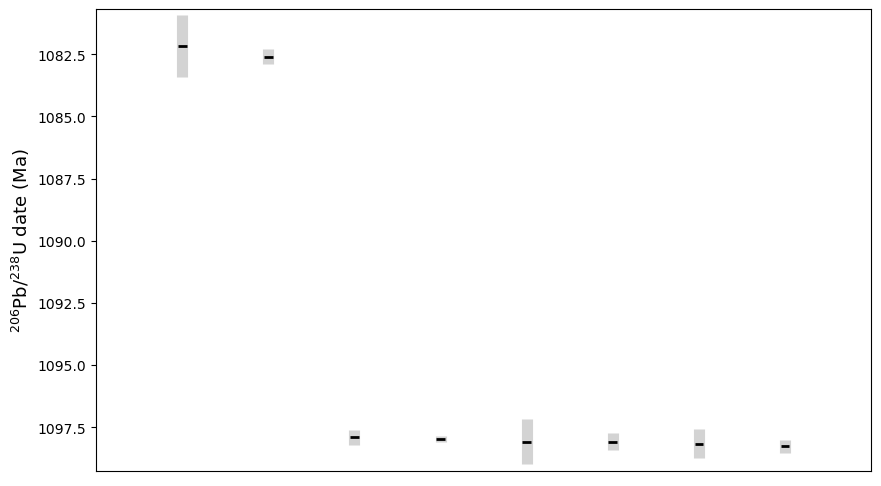

In [68]:
plt.figure(figsize=(10,6))
sample_width = 1

for i in range(len(Mohr2023a_data)):
    current_x = i+1
    this_mean_age = Mohr2023a_data['206Pb/238U age (Ma)'][i]
    this_2_sigma = Mohr2023a_data['2_sigma'][i]
    this_age_lower = this_mean_age - this_2_sigma
    this_age_upper = this_mean_age + this_2_sigma
    this_n = Mohr2023a_data['n'][i]


    plt.gca().vlines(current_x, this_mean_age-this_2_sigma, this_mean_age+this_2_sigma, color='lightgrey', lw=8)

    plt.gca().hlines(this_mean_age, xmin = current_x-.05, xmax = current_x+.05, color='k', lw=2)

    # plt.axhline(this_mean_age, current_x-1, current_x+sample_width)

plt.xlim(0, len(Mohr2023a_data)+1)
plt.xticks([])
plt.ylim(Mohr2023a_data['206Pb/238U age (Ma)'].min()-1.5, Mohr2023a_data['206Pb/238U age (Ma)'].max()+1)
plt.gca().invert_yaxis()
plt.ylabel('$^{206}$Pb/$^{238}$U date (Ma)',fontsize=13)